Saving fear_greed_index.csv to fear_greed_index (1).csv
Saving historical_data.csv to historical_data (2).csv


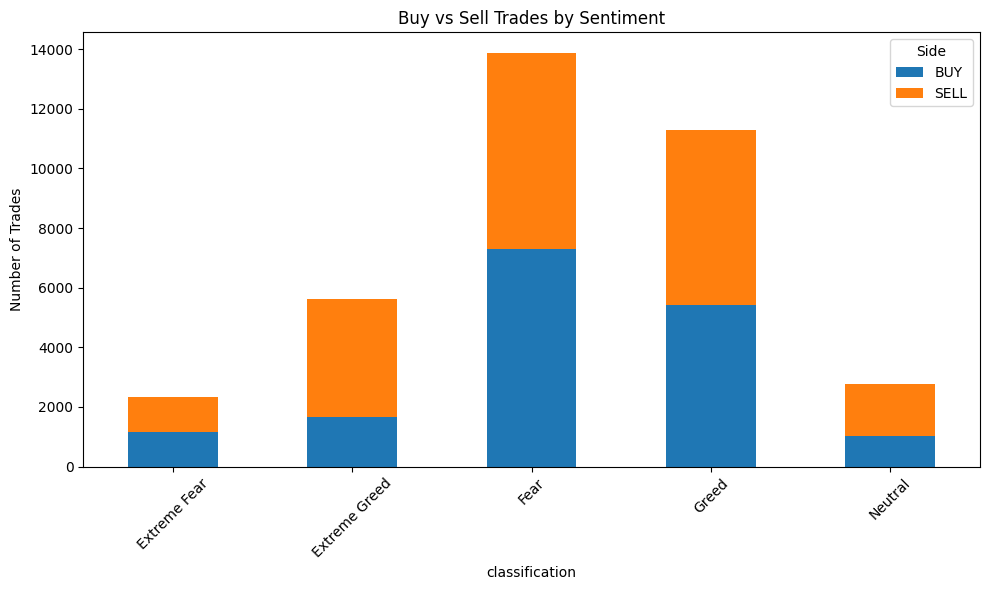

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
uploaded = files.upload()

historical_df = pd.read_csv("historical_data.csv")
sentiment_df = pd.read_csv("fear_greed_index.csv")

historical_df['Date'] = pd.to_datetime(historical_df['Timestamp IST'], errors='coerce').dt.date
sentiment_df['Date'] = pd.to_datetime(sentiment_df['date'], errors='coerce').dt.date

merged_df = pd.merge(historical_df, sentiment_df[['Date', 'classification']], on='Date', how='inner')


merged_df['Closed PnL'] = pd.to_numeric(merged_df['Closed PnL'], errors='coerce')
merged_df['Size USD'] = pd.to_numeric(merged_df['Size USD'], errors='coerce')

merged_df.groupby('classification')[['Closed PnL', 'Size USD']].mean()


merged_df['Side'] = merged_df['Side'].fillna('Unknown')
merged_df.groupby(['classification', 'Side']).size().unstack().plot(kind='bar', stacked=True, figsize=(10,6))
plt.title("Buy vs Sell Trades by Sentiment")
plt.ylabel("Number of Trades")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



